이미지 불러오기

Skin Detection

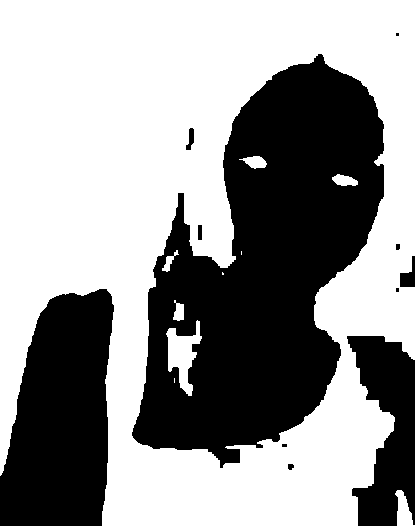

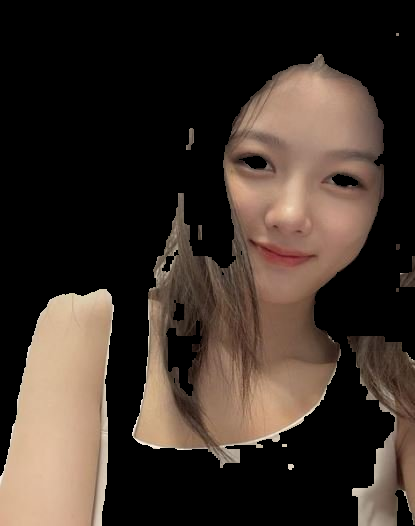

In [15]:
# Skin Detection
# 낱개의 이미지를 바로 시각화하여 볼 수 있는 코드
from google.colab.patches import cv2_imshow
import cv2

img_path = "/content/drive/MyDrive/퍼스널컬러_jpg/웜톤_jpg/김유정.jpg"
#Open a simple image
img=cv2.imread(img_path)

#converting from gbr to hsv color space
# img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space
# HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255))
# HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135))
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

# 피부영역을 어둡게 표현하기 위해 bitwise_not연산 사용
# HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)



# Extract the skin regions from the original image
# HSV_skin_detected = cv2.bitwise_and(img, img, mask=HSV_mask)
YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)



#show results
# cv2_imshow(HSV_result)
cv2_imshow(YCrCb_result)

# cv2_imshow(HSV_skin_detected)
cv2_imshow(YCrCb_skin_detected)


In [16]:
import os

folder_path = "/content/drive/MyDrive/퍼스널컬러_jpg/웜톤_jpg/"
output_folder = "/content/drive/MyDrive/퍼스널컬러_jpg/웜톤_jpg_results/"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Iterate over each image file
for image_file in image_files:
    # Read the image
    img_path = os.path.join(folder_path, image_file)
    img = cv2.imread(img_path)

    # Applying skin detection code
    img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255, 180, 135))
    YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
    YCrCb_result = cv2.bitwise_not(YCrCb_mask)
    YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

    # Save the results
    output_file = os.path.join(output_folder, image_file)
    cv2.imwrite(output_file, YCrCb_skin_detected)


In [17]:
import os
import cv2
import numpy as np

In [18]:
warm_tone = [255, 0, 0]  # 빨간색
cool_tone = [0, 0, 255]  # 파란색

def zero_shot_classification(color_vector):
    warm_similarity = np.dot(color_vector, warm_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(warm_tone))
    cool_similarity = np.dot(color_vector, cool_tone) / (np.linalg.norm(color_vector) * np.linalg.norm(cool_tone))

    if warm_similarity > cool_similarity:
        return "웜톤"
    else:
        return "쿨톤"

In [19]:
def classify_images_in_folder(input_folder, output_folder):
    # Get a list of all image files in the folder
    image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

    # Iterate over each image file
    for image_file in image_files:
        # Read the image
        img_path = os.path.join(input_folder, image_file)
        img = cv2.imread(img_path)

        # Applying skin detection code
        img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255, 180, 135))
        YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
        YCrCb_result = cv2.bitwise_not(YCrCb_mask)
        YCrCb_skin_detected = cv2.bitwise_and(img, img, mask=YCrCb_mask)

        # Classify the image
        classification_result = classify_image(YCrCb_skin_detected)

        # Save the classification result
        output_file = os.path.join(output_folder, image_file)
        with open(output_file, 'w') as f:
            f.write(classification_result)

In [20]:
def classify_image(image):
    image = image / 255.0  # 이미지를 0~1 범위로 정규화
    height, width, _ = image.shape
    colors = np.reshape(image, (height * width, 3))  # 이미지의 모든 픽셀을 1차원 벡터로 변환

    color_labels = []
    for color in colors:
        color_label = zero_shot_classification(color)
        color_labels.append(color_label)

    warm_tone_count = color_labels.count('웜톤')
    cool_tone_count = color_labels.count('쿨톤')

    warm_tone_ratio = warm_tone_count / len(color_labels) * 100
    cool_tone_ratio = cool_tone_count / len(color_labels) * 100

    return f"웜톤: {warm_tone_ratio:.2f}%\n쿨톤: {cool_tone_ratio:.2f}%"